In [ ]:
pip install parsivar

     |████████████████████████████████| 36.2 MB 365 kB/s 
     |████████████████████████████████| 1.5 MB 51.6 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=0c8cb9a3057071895dd0f6885b3a91e2b7e672c4dc2c24d138e43ba026693d38
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449922 sha256=fdbb2d04b72bb35024c97f08e12f6efb810eca772eb3cfc8863065834bf376e1
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import numpy as np
import pandas as pd
from IPython import display
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from __future__ import unicode_literals
import parsivar
from parsivar import Normalizer 
from parsivar import Tokenizer 
from parsivar import FindStems

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd /content/gdrive/MyDrive/summary/

/content/gdrive/MyDrive/summary


In [ ]:
train = pd.read_csv('WIKI_train.csv' , sep='\t')
train.head()

,id,link,title,article,highlights
0,50d87b5341f6a119dbeef8f029f79956f4018714,https://fa.wikipedia.org/wiki/آنتونن_مان,آنتونن مان,مان عضو تیم آللویا بود که در سال ۱۹۲۷ برندهٔ ج...,آنتونن مان (تلفظ می‌شود : [ ɑ̃ . tɔ . nɛ̃ maɲ ...
1,1007f5ea734dda9133acadce25d052e4dfa0ecbb,https://fa.wikipedia.org/wiki/ابوالحسن_فیروزابادی,ابوالحسن فیروزابادی,در ۹ خرداد ۱۳۹۷ ، وزارت خزانه‌داری ایالات متحد...,ابوالحسن فیروزآبادی (زادهٔ ۱۳۴۰ در نجف عراق) س...
2,8a25152400051da593e33272dea8c63110e4fdf7,https://fa.wikipedia.org/wiki/نابرابری_هوفدینگ,نابرابری هوفدینگ,یکی از سوالات اساسی در احتمالات ، آمار و یادگی...,در نظریه احتمال ، نابرابری هوفدینگ (hoeffding'...
3,0857a360bdc18a95faabbe71394387de763c27f0,https://fa.wikipedia.org/wiki/سپس_هیچ_کدام_باق...,سپس هیچ کدام باقی نماندند (مجموعه تلویزیونی),در یک روز گرم در اواخر اوت سال ۱۹۳۹ ، هشت نفر ...,سپس هیچ‌کدام باقی نماندند (انگلیسی : and then ...
4,2afe275ce443821bb19f4951f9dfdf52f20e12a6,https://fa.wikipedia.org/wiki/دبی_رو,دبی رو,دبی رو در اواسط دهه ۸۰ زمانی که جکسون برای درم...,دبورا جین « دبی » رو (به انگلیسی : deborah jea...


In [ ]:
train.shape

(45653, 5)

In [ ]:
print(train.loc[0, 'article'])

مان عضو تیم آللویا بود که در سال ۱۹۲۷ برندهٔ جایزه بزرگ ولبر شد . این جایزه بزرگ را مسابقات قهرمانی جادهٔ غیر رسمی جهان در نظر می‌گرفتند . نخستین حضور مان در تور دو فرانس نیز در همان سال بود که در کنار آندره لدیک در تیم فرانسه قرار داشت . دو پیروزی مانی در تور کیفیت غریبی داشت ؛ زیرا همواره با تصادف ، سقوط و بدشانسی روبرو بود . در تور ۱۹۳۱ تصادف کرد و بارها پسانتی ایتالیایی و دمویسر بلژیکی حمله کردند تا از او پیشی بگیرند . در پایان تور به اندازه‌ای خسته بود که در دورهٔ بعد شرکت نکرد . در سال ۱۹۳۴ دوباره با کمک هم‌تیمی‌های خود رنه ویتو ، ژرژ اسپیشه و روژه لاپبی به پیروزی رسید . مان برندهٔ نخستین تایم تریل تور دو فرانس شد که به مسافت ۸۰ کیلومتر در سال ۱۹۳۴ برگزار شده‌بود . در سال ۱۹۳۶ مان در تور دو فرانس بر سکوی دوم ایستاد و قهرمان مسابقهٔ استقامت جاده در مسابقات قهرمانی جهان شد . مان در روز دوم رهبری تور را در دست گرفت و تیم او در ۱۹ مرحله از ۲۳ مرحله پیروز شد . هنگامی که در پیرنه دوچرخه‌اش شکست ، امیدش از میان رفت . جوان‌ترین رکابزن تیمش رنه ویتو در حالی که خودش در رتبهٔ سوم بود ، دوچر

In [ ]:
print(train.loc[0, 'highlights'])

آنتونن مان (تلفظ می‌شود : [ ɑ̃ . tɔ . nɛ̃ maɲ ] ؛ ۱۵ فوریهٔ ۱۹۰۴ -۸ سپتامبر ۱۹۸۳) رکابزن فرانسوی بود که در رشتهٔ دوچرخه‌سواری جاده فعالیت می‌کرد . او توانست در سال‌های ۱۹۳۱ و ۱۹۳۴ برندهٔ تور دو فرانس شود . فعالیت حرفه‌ای مان از سال ۱۹۲۷ تا ۱۹۳۹ به طول انجامید و پس از آن به مربی‌گری پرداخت . شهرت او به فرار از مصاحبه و خبرنگاران بود .


In [ ]:
train = train[['highlights','article']]

In [ ]:
train['text_length'] = train['article'].str.count(' ')

In [ ]:
train['text_length'].describe()

count    7485.000000
mean      275.283367
std        77.902591
min        14.000000
25%       244.000000
50%       285.000000
75%       332.000000
max       389.000000
Name: text_length, dtype: float64

In [ ]:
train['summary_length'] = train['highlights'].str.count(' ')
train['summary_length'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    7485.000000
mean       34.837141
std        13.006373
min        12.000000
25%        24.000000
50%        34.000000
75%        46.000000
max        59.000000
Name: summary_length, dtype: float64

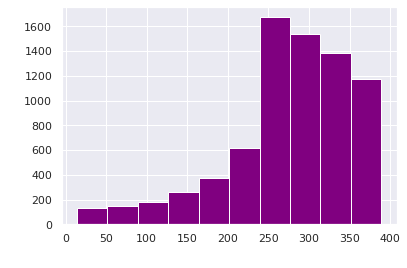

In [ ]:
plt.hist(train['text_length'] , color= 'purple')
plt.xticks(rotation=0)
plt.xlabel(' ')
plt.ylabel(' ')
sns.set_theme()
plt.show()

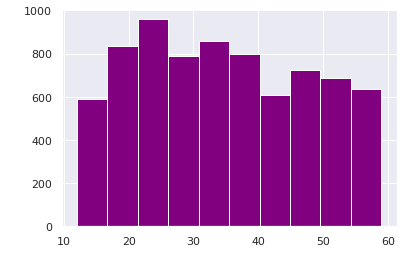

In [ ]:
plt.hist(train['summary_length'] , color= 'purple')
plt.xticks(rotation=0)
plt.xlabel(' ')
plt.ylabel(' ')
sns.set_theme()
plt.show()

In [ ]:
train = train.loc[train['summary_length']<60]

In [ ]:
train = train.loc[train['text_length']<390]

In [ ]:
print(train.shape)

(7485, 4)


In [ ]:
my_normalizer = Normalizer(pinglish_conversion_needed=True,date_normalizing_needed=True)

In [ ]:
# sentences = []
# for i in range(len(train['article'])):
#     normal = my_normalizer.normalize(train['article'][i])
#     print(normal)
#     print('__________________________')
#     sentences.append(normal)
#     #replace normalize sentences 
#     train['article'] = train['article'].replace(train['article'][i],sentences[i])

In [ ]:
train['text_no_punctuation'] = train['article'].str.replace('[^\w\s]','')
train['text_no_punctuation'] = train['text_no_punctuation'].str.replace('[^آا-ی]',' ')
train['text_no_punctuation'] = train['text_no_punctuation'].str.replace('\([^)]*\)','')

In [ ]:
train['summary_no_punctuation'] =  '_start_' + ' ' +train['highlights'].str.replace('[^\w\s]','')+ ' ' +'_end_'

In [ ]:
train

,highlights,article,text_length,summary_length,text_no_punctuation,summary_no_punctuation
2,در نظریه احتمال ، نابرابری هوفدینگ (hoeffding'...,یکی از سوالات اساسی در احتمالات ، آمار و یادگی...,311,39,یکی از سوالات اساسی در احتمالات آمار و یادگیر...,_start_ در نظریه احتمال نابرابری هوفدینگ hoef...
4,دبورا جین « دبی » رو (به انگلیسی : deborah jea...,دبی رو در اواسط دهه ۸۰ زمانی که جکسون برای درم...,269,43,دبی رو در اواسط دهه زمانی که جکسون برای درم...,_start_ دبورا جین دبی رو به انگلیسی deborah...
6,جان محمد نبی زاده (متولد ۱۳۵۳ در ولایت تخار) ر...,جان محمد در ماه اسد سال ۱۳۵۳ در روستای دهبالا ...,152,52,جان محمد در ماه اسد سال در روستای دهبالا ...,_start_ جان محمد نبی زاده متولد ۱۳۵۳ در ولایت ...
9,مختصات : ۳۶ ° ۱۵ ′ ۵۷ ٫ ۲۶ ″ شمالی ۵۰ °۰′ ۱۷ ٫...,عمارت سردار مفخم توسط شاهزاده اکبر میرزا ملقب ...,379,54,عمارت سردار مفخم توسط شاهزاده اکبر میرزا ملقب ...,_start_ مختصات ۳۶ ۱۵ ۵۷ ۲۶ شمالی ۵۰ ۰ ۱۷ ...
12,عارف ملکوف (ترکی آذربایجانی : arif məlikov‎ ؛ ...,عارف ملکوف ۱۳ سپتامبر سال ۱۹۳۳ در شهر باکوی آذ...,371,31,عارف ملکوف سپتامبر سال در شهر باکوی آذ...,_start_ عارف ملکوف ترکی آذربایجانی arif məlik...
...,...,...,...,...,...,...
45627,حمیدرضا گنگوزهی (درگذشتهٔ ۱۵ فروردین ۱۳۹۵ در خ...,حمیدرضا گنگوزهی بلوچ معلم دبستان ۵۳ نفری در رو...,290,35,حمیدرضا گنگوزهی بلوچ معلم دبستان نفری در رو...,_start_ حمیدرضا گنگوزهی درگذشته ۱۵ فروردین ۱۳۹...
45638,مافیای آذربایجانی ، اصطلاحی عمومی برای گروه‌ها...,مافیای آذربایجانی ، یکی از قدیمی‌ترین گروه‌های...,275,57,مافیای آذربایجانی یکی از قدیمیترین گروههای ما...,_start_ مافیای آذربایجانی اصطلاحی عمومی برای ...
45641,فیلیپ آنتونی جونز (به انگلیسی : philip anthony...,جونز در سال ۲۰۰۳ به عضویت تیم جوانان بلکبرن را...,251,51,جونز در سال به عضویت تیم جوانان بلکبرن را...,_start_ فیلیپ آنتونی جونز به انگلیسی philip a...
45642,خانواده دونالد ترامپ ، رئیس‌جمهور ایالات متحده...,"ملانیا ترامپ (پیشتر کناوس) , همسر سوم دونالد ت...",373,58,ملانیا ترامپ پیشتر کناوس همسر سوم دونالد ترام...,_start_ خانواده دونالد ترامپ رئیسجمهور ایالات...


In [ ]:
print(train.loc[2, 'summary_no_punctuation'])

_start_ در نظریه احتمال  نابرابری هوفدینگ hoeffdings inequality ابزاری قدرتمند جهت محدود کردن جمع تعدادی متغیر تصادفی مستقل کراندار  است که کاربردهای وسیعی در یادگیری ماشین دارد  نابرابری هوفدینگ توسط واسیلی هوفدینگ در سال ۱۹۶۳ ثابت شد  _end_


In [ ]:
max_features1 = 5000
maxlen1 = 295

max_features2 = 5000
maxlen2 = 35

In [ ]:
tok1 = tf.keras.preprocessing.text.Tokenizer(num_words=max_features1) 
tok1.fit_on_texts(list(train['text_no_punctuation'].astype(str)))

In [ ]:
tf_train_text = tok1.texts_to_sequences(list(train['text_no_punctuation'].astype(str)))
tf_train_text = tf.keras.preprocessing.sequence.pad_sequences(tf_train_text, maxlen=maxlen1)

In [ ]:
tok2 = tf.keras.preprocessing.text.Tokenizer(num_words=max_features2, filters = '*') 
tok2.fit_on_texts(list(train['summary_no_punctuation'].astype(str)))

In [ ]:
tf_train_summary = tok2.texts_to_sequences(list(train['summary_no_punctuation'].astype(str)))
tf_train_summary = tf.keras.preprocessing.sequence.pad_sequences(tf_train_summary, maxlen=maxlen2, padding ='post') 

In [ ]:
tf_train_summary.shape

(7485, 35)

In [ ]:
vectorized_summary = tf_train_summary
vectorized_summary

array([[   3,    2,  429, ...,    0,    0,    0],
       [   3, 1066, 3693, ...,   50,    4,    0],
       [ 718,    2, 1002, ...,    1,  115,    4],
       ...,
       [1047,  141,   14, ...,  255,  290,    4],
       [   8,    2,    1, ...,  260,  479,    4],
       [  22, 1052,    6, ..., 2646,    5,    4]], dtype=int32)

In [ ]:
# For Decoder Input, you don't need the last word as that is only for prediction
# when we are training using Teacher Forcing.
decoder_input_data = vectorized_summary[:, :-1]

In [ ]:
# Decoder Target Data Is Ahead By 1 Time Step From Decoder Input Data (Teacher Forcing)
decoder_target_data = vectorized_summary[:, 1:]

In [ ]:
print(f'Shape of decoder input: {decoder_input_data.shape}')
print(f'Shape of decoder target: {decoder_target_data.shape}')

vectorized_text = tf_train_text
# Encoder input is simply the body of the issue text
encoder_input_data = vectorized_text
doc_length = encoder_input_data.shape[1]
print(f'Shape of encoder input: {encoder_input_data.shape}')

Shape of decoder input: (7485, 34)
Shape of decoder target: (7485, 34)
Shape of encoder input: (7485, 295)


In [ ]:
vocab_size_encoder = len(tok1.word_index) + 1
vocab_size_decoder = len(tok2.word_index) + 1

In [ ]:
latent_dim = 50

In [ ]:
encoder_inputs = tf.keras.Input(shape=(doc_length,), name='Encoder-Input')

x = tf.keras.layers.Embedding(vocab_size_encoder,
                              latent_dim, name='Body-Word-Embedding',
                              mask_zero=False)(encoder_inputs)

#Batch normalization is used so that the distribution of the inputs 
#to a specific layer doesn't change over time
x = tf.keras.layers.BatchNormalization(name='Encoder-Batchnorm-1')(x)

# We do not need the `encoder_output` just the hidden state.
_, state_h = tf.keras.layers.GRU(latent_dim, return_state=True, name='Encoder-Last-GRU')(x)

# Encapsulate the encoder as a separate entity so we can just 
#  encode without decoding if we want to.
encoder_model = tf.keras.Model(inputs=encoder_inputs, outputs=state_h, name='Encoder-Model')

seq2seq_encoder_out = encoder_model(encoder_inputs)

########################
#### Decoder Model ####
decoder_inputs = tf.keras.Input(shape=(None,), name='Decoder-Input')# for teacher forcing

# Word Embedding For Decoder 
dec_emb = tf.keras.layers.Embedding(vocab_size_decoder, latent_dim, 
                                    name='Decoder-Word-Embedding',
                                    mask_zero=False)(decoder_inputs)
#again batch normalization
dec_bn = tf.keras.layers.BatchNormalization(name='Decoder-Batchnorm-1')(dec_emb)

# Set up the decoder, using `decoder_state_input` as initial state.
decoder_gru = tf.keras.layers.GRU(latent_dim, 
                                  return_state=True,
                                  return_sequences=True,
                                  name='Decoder-GRU')

decoder_gru_output, _ = decoder_gru(dec_bn, initial_state=seq2seq_encoder_out)

x = tf.keras.layers.BatchNormalization(name='Decoder-Batchnorm-2')(decoder_gru_output)

# Dense layer for prediction
decoder_dense = tf.keras.layers.Dense(vocab_size_decoder,
                                      activation='softmax',
                                      name='Final-Output-Dense')
decoder_outputs = decoder_dense(x)

########################
#### Seq2Seq Model ####
seq2seq_Model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

seq2seq_Model.compile(optimizer=tf.keras.optimizers.Nadam(lr=0.001), 
                      loss='sparse_categorical_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


In [ ]:
seq2seq_Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Decoder-Input (InputLayer)     [(None, None)]       0           []                               
                                                                                                  
 Decoder-Word-Embedding (Embedd  (None, None, 50)    1656700     ['Decoder-Input[0][0]']          
 ing)                                                                                             
                                                                                                  
 Encoder-Input (InputLayer)     [(None, 295)]        0           []                               
                                                                                                  
 Decoder-Batchnorm-1 (BatchNorm  (None, None, 50)    200         ['Decoder-Word-Embedding[0][0

In [ ]:
batch_size = 100
epochs = 40

In [ ]:
history = seq2seq_Model.fit([encoder_input_data, decoder_input_data],
                            np.expand_dims(decoder_target_data, -1),
                            batch_size=batch_size, 
                            epochs=epochs, 
                            validation_split=0.12) 

Epoch 1/40
66/66 [==============================] - 165s 2s/step - loss: 9.0391 - val_loss: 9.7005
Epoch 2/40
66/66 [==============================] - 158s 2s/step - loss: 6.2271 - val_loss: 7.8298
Epoch 3/40
66/66 [==============================] - 159s 2s/step - loss: 5.0547 - val_loss: 7.4699
Epoch 4/40
66/66 [==============================] - 158s 2s/step - loss: 4.5710 - val_loss: 7.3151
Epoch 5/40
66/66 [==============================] - 158s 2s/step - loss: 4.1918 - val_loss: 7.0610
Epoch 6/40
66/66 [==============================] - 158s 2s/step - loss: 3.9341 - val_loss: 6.2376
Epoch 7/40
66/66 [==============================] - 158s 2s/step - loss: 3.7421 - val_loss: 5.4413
Epoch 8/40
66/66 [==============================] - 157s 2s/step - loss: 3.5859 - val_loss: 4.7890
Epoch 9/40
66/66 [==============================] - 158s 2s/step - loss: 3.4482 - val_loss: 4.1190
Epoch 10/40
66/66 [==============================] - 158s 2s/step - loss: 3.3264 - val_loss: 3.8816
Epoch 11/

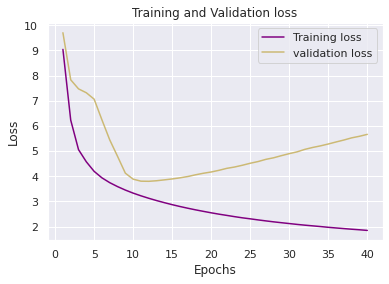

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'purple', label='Training loss')
plt.plot(epochs, loss_val, 'y', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
seq2seq_Model.save('SumWiki')
seq2seq_Model.save('SumWiki.h5')


INFO:tensorflow:Assets written to: SumWiki/assets


INFO:tensorflow:Assets written to: SumWiki/assets


In [ ]:
test_text = ["""
رئیس بهره برداری پالایشگاه سوم مجتمع پارس جنوبی امروز، دوشنبه (۲۳ شهریورماه) در گفتگو با خبرنگار شانا اظهار کرد: این پالایشگاه برنامه تعمیرات اساسی خود را براساس حفظ ضریب دسترس پذیری ۹۷ درصدی سال گذشته ابتدا در بازه ۱۷ روزه برنامه ریزی کرده بود. [n] محسن عطارزاده ادامه داد: پالایشگاه سوم با بررسی دقیق شرایط عملیاتی در طول سال، کسب اطمینان از تولید پایدار گاز و قبول ریسک انجام فعالیتهای ضروری پیش از زمستان و همچنین با مد نظر قرار گرفتن حذف تعمیرات بالادستی (سکوهای پالایشگاه)، تصمیم به اجرا نکردن پروژه تعمیرات اساسی سال جاری گرفت تا در اقدامی آگاهانه و رو به جلو، رکورد تولید پایدار ۳۶۵ روزه خود را در سال جاری ثبت کند. [n] وی افزود: به این ترتیب پالایشگاه سوم پارس جنوبی در کنار حفظ تولید سالهای ۹۲ و ۹۳ که ضریب اطمینان ۹۹٫۹۷ درصدی را ارائه کرده است، در سال جاری علاوه بر ضریب اطمینان تولید، ضریب دسترس پذیری بالاتری را تثبیت می‌کند. [n] به گفته رئیس بهره برداری پالایشگاه سوم مجتمع پارس جنوبی، با حذف تعمیرات اساسی و تداوم ۱۷ روزه برداشت گاز از مخازن مشترک، تولید پالایشگاه نسبت به سال گذشته سه درصد افزایش خواهد داشت که درآمدی بیش از ۴۰۰ میلیارد تومان، معادل یک درصد بودجه عمرانی کل کشور را در بر می‌گیرد. [n] عطارزاده از اعتماد مدیرعامل مجتمع، مدیر پالایشگاه، اهتمام همکاران واحدهای بهره ‌برداری، مهندسی، تعمیرات، بازرسی فنی و سایر واحدهای پشتیبانی در دستیابی به این موفقیت، تقدیر و تشکر کرد.
"""]

In [ ]:
# get the encoder's features for the decoder
tok1.fit_on_texts(test_text)

In [ ]:
raw_tokenized = tok1.texts_to_sequences(test_text)
raw_tokenized = tf.keras.preprocessing.sequence.pad_sequences(raw_tokenized, maxlen=maxlen1)

In [ ]:
body_encoding = encoder_model.predict(raw_tokenized) #predict the encoder state of the new sentence

In [ ]:
latent_dim = seq2seq_Model.get_layer('Decoder-Word-Embedding').output_shape[-1]

In [ ]:
#remember the get layer methodo for getting the embedding (word clusters)
decoder_inputs = seq2seq_Model.get_layer('Decoder-Input').input 
dec_emb = seq2seq_Model.get_layer('Decoder-Word-Embedding')(decoder_inputs)
dec_bn = seq2seq_Model.get_layer('Decoder-Batchnorm-1')(dec_emb)

In [ ]:
gru_inference_state_input = tf.keras.Input(shape=(latent_dim,), name='hidden_state_input')

In [ ]:
gru_out, gru_state_out = seq2seq_Model.get_layer('Decoder-GRU')([dec_bn,
                                                                 gru_inference_state_input])

In [ ]:
# Reconstruct dense layers
dec_bn2 = seq2seq_Model.get_layer('Decoder-Batchnorm-2')(gru_out)
dense_out = seq2seq_Model.get_layer('Final-Output-Dense')(dec_bn2)

In [ ]:
decoder_model = tf.keras.Model([decoder_inputs, gru_inference_state_input],
                               [dense_out, gru_state_out])

In [ ]:
# we want to save the encoder's embedding before its updated by decoder
#   because we can use that as an embedding for other tasks.
original_body_encoding = body_encoding

In [ ]:
state_value = np.array(tok2.word_index['_start_']).reshape(1, 1)

In [ ]:
state_value

array([[3]])

In [ ]:
decoded_sentence = []
stop_condition = Falsedecoded_sentence = []
stop_condition = False

In [ ]:
vocabulary_inv = dict((v, k) for k, v in tok2.word_index.items())

In [ ]:
vocabulary_inv

{1: 'و',
 2: 'در',
 3: '_start_',
 4: '_end_',
 5: 'است',
 6: 'به',
 7: 'از',
 8: 'که',
 9: 'این',
 10: 'بود',
 11: 'سال',
 12: 'زاده',
 13: 'ایران',
 14: 'انگلیسی',
 15: 'یک',
 16: 'با',
 17: 'یا',
 18: 'را',
 19: 'او',
 20: 'شد',
 21: 'تهران',
 22: 'نام',
 23: 'اهل',
 24: 'میشود',
 25: 'ایرانی',
 26: 'آن',
 27: 'برای',
 28: 'وی',
 29: 'یکی',
 30: 'شدهاست',
 31: 'درگذشته',
 32: 'فیلم',
 33: 'تا',
 34: 'میباشد',
 35: 'نویسنده',
 36: 'دارد',
 37: 'شهر',
 38: 'استان',
 39: 'شده',
 40: 'بر',
 41: 'شهرستان',
 42: 'توسط',
 43: 'دانشگاه',
 44: 'کارگردانی',
 45: 'روز',
 46: 'متولد',
 47: 'عنوان',
 48: 'کرد',
 49: 'بازیگر',
 50: 'میکند',
 51: 'میلادی',
 52: 'ملی',
 53: 'بخش',
 54: 'بازی',
 55: 'فوتبال',
 56: 'آمریکا',
 57: 'نیز',
 58: 'قرار',
 59: 'شرقی',
 60: 'آمریکایی',
 61: 'کشور',
 62: 'دوره',
 63: 'واقع',
 64: 'دو',
 65: 'تاریخ',
 66: 'کارگردان',
 67: 'کتاب',
 68: 'خود',
 69: 'اسلامی',
 70: 'شمالی',
 71: 'مجموعه',
 72: 'موسیقی',
 73: 'شناخته',
 74: 'محمد',
 75: 'جمهوری',
 76: 'عضو',
 77: 

In [ ]:
while not stop_condition:

    preds, st = decoder_model.predict([state_value, body_encoding])

    pred_idx = np.argmax(preds[:, :, 2:]) + 2
    pred_word_str = vocabulary_inv[pred_idx]
    print(pred_word_str)
    if pred_word_str == '_end_' or len(decoded_sentence) >= maxlen2:
        stop_condition = True
        break
    decoded_sentence.append(pred_word_str)

    # update the decoder for the next word
    body_encoding = st
    state_value = np.array(pred_idx).reshape(1, 1)

روستایی
است
در
بخش
مرکزی
شهرستان
قرار
دارد
_end_


In [ ]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)